<a href="https://colab.research.google.com/github/khaitrinh2010/Blog-Project/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf

In [7]:
data = tf.keras.datasets.fashion_mnist

In [8]:
data = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
(X_train, y_train), (X_test, y_test) =  data

In [ ]:
X_train.shape

(60000, 28, 28, 1, 1, 1)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout

In [ ]:
from tensorflow.keras.models import Model


In [4]:
X_train, X_test = X_train/255, X_test/255


NameError: name 'X_train' is not defined

In [12]:
# Assuming X_train and X_test are your datasets

# Reshape the entire datasets to include the channel dimension
import numpy as np
X_train = np.squeeze(X_train, axis=-1)
X_test = np.squeeze(X_test, axis=-1)
X_train.shape

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dense(len(set(y_train)), activation="softmax")(x)
model = Model(i, x)


In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", #used when the labels are integer
              metrics=["accuracy"])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs =  15)

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5075 - accuracy: 0.8140 - val_loss: 0.4100 - val_accuracy: 0.8481
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3461 - accuracy: 0.8702 - val_loss: 0.3481 - val_accuracy: 0.8706
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2918 - accuracy: 0.8914 - val_loss: 0.3234 - val_accuracy: 0.8845
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2543 - accuracy: 0.9051 - val_loss: 0.3165 - val_accuracy: 0.8883
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2255 - accuracy: 0.9155 - val_loss: 0.3004 - val_accuracy: 0.8938
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1981 - accuracy: 0.9260 - val_loss: 0.2951 - val_accuracy: 0.8966
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1730 - accuracy: 0.9358 - val_loss: 0.3154 - val_ac

In [ ]:
from PIL import Image
import numpy as np
image_path = "/content/air-jordan-1-mid-sneaker-school-older-shoes-hsQCKD.png"
new_image = Image.open(image_path)

In [ ]:
from matplotlib import pyplot as plt

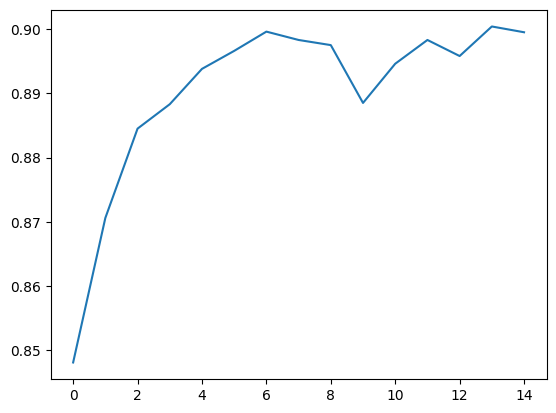

In [ ]:
plt.plot(r.history["val_accuracy"])

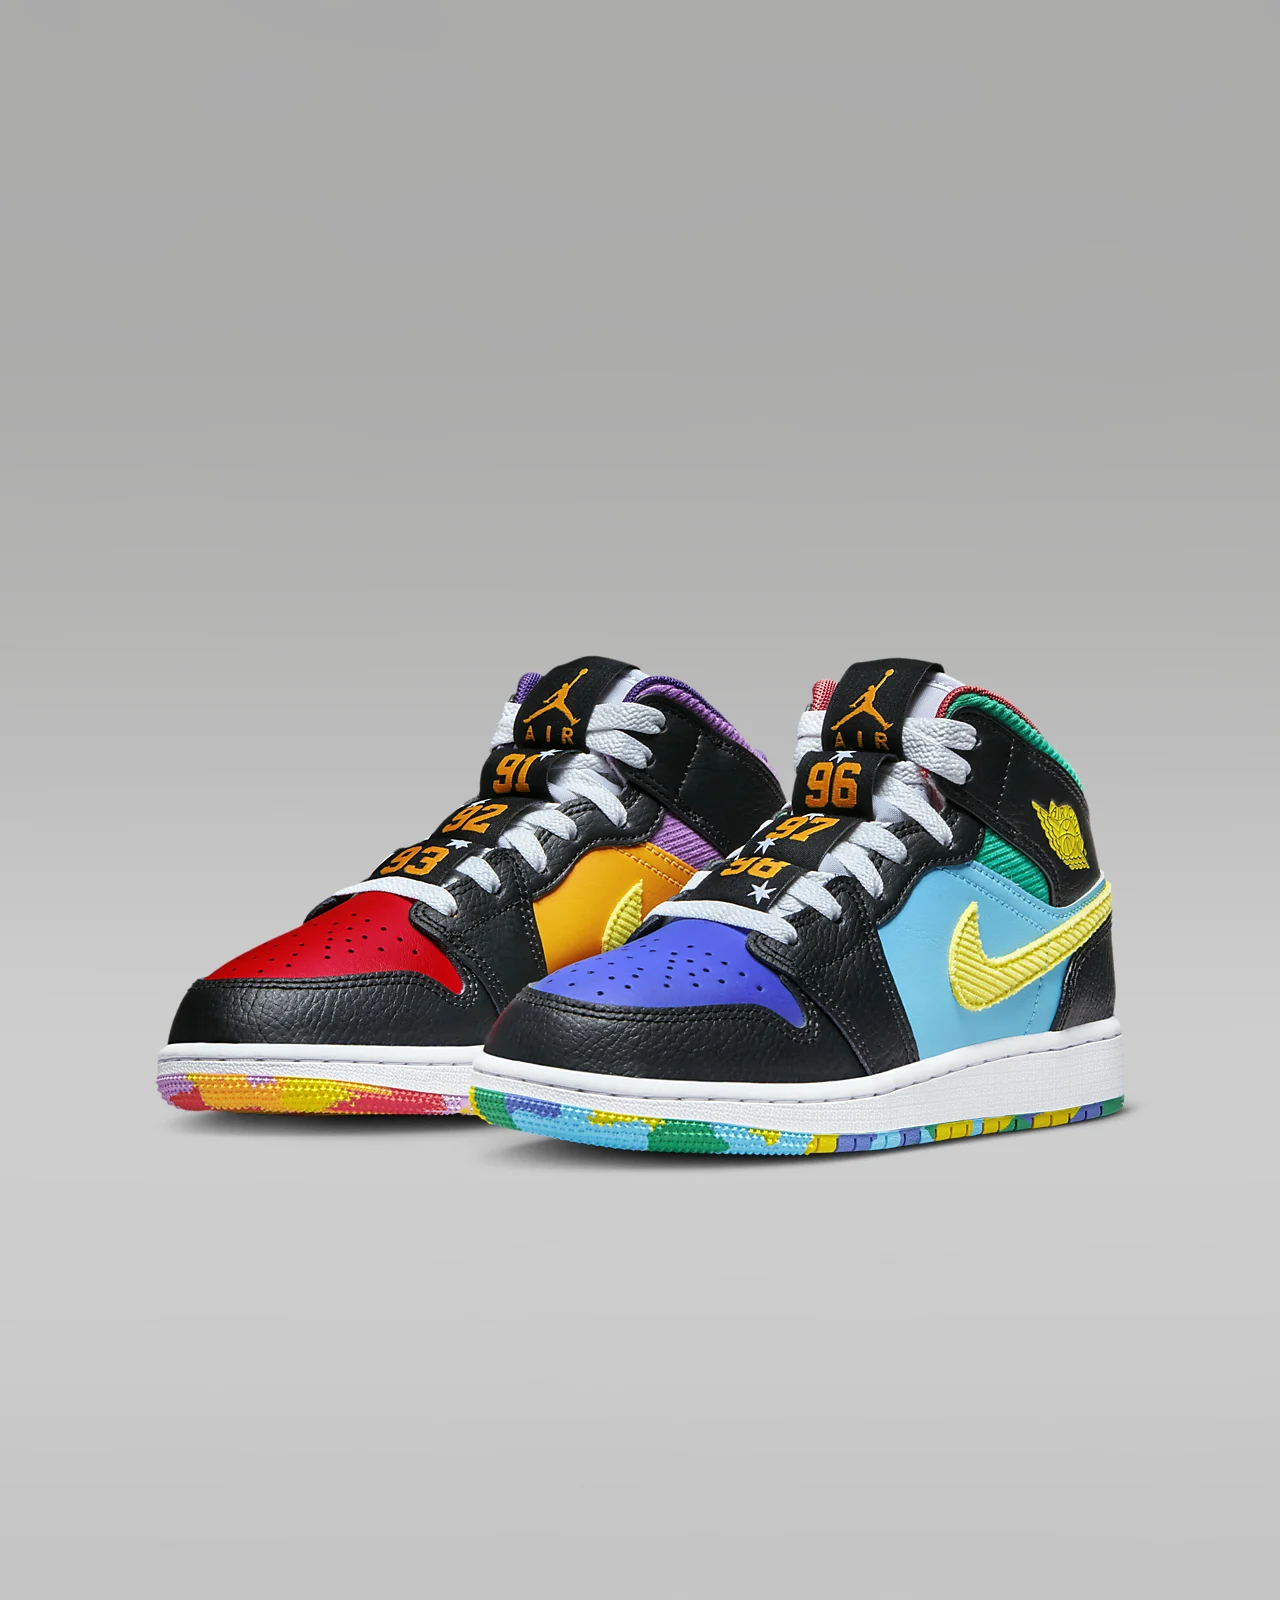

In [ ]:
new_image


In [ ]:
image_resized = new_image.resize((28, 28)).convert('L') #convert to grayscale
image_resized
# Convert to numpy array and normalize
# image_array = np.array(image_resized) / 255.0

# # Expand dimensions to add batch size
# image_array = np.expand_dims(image_array, axis=0)  # Now the shape is (1, 28, 28)

In [ ]:
prediction = model.predict(image_array)
len(prediction[0])
prediction

1/1 [==============================] - 0s 19ms/step


array([[1.4817977e-03, 1.2279326e-06, 3.3163782e-05, 5.4094904e-05,
        7.5088789e-09, 2.8300162e-06, 3.0083575e-07, 2.4386740e-05,
        9.9657297e-01, 1.8292906e-03]], dtype=float32)

In [ ]:
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
maxIndex = np.argmax(prediction[0])
print(fashion_mnist_labels[maxIndex])

Bag
